# Predicting Movie Earnings
    Thomas van der Molen
    S4-AI41

## Table of Contents
- [Version History](#Version-History)
- [Domain Understanding](#Domain-Understanding)  
  * [Introduction](#Introduction)
  * [Problem Statement](#Problem-Statement)
  * [Target Audience](#Target-Audience)
  * [Expert Domain Clarification](#Expert-Domain-Clarification)
- [Data Sourcing](#Data-Sourcing)
  * [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Analytic Approach](#Analytic-Approach)
- [Evaluation](#Evaluation)

In [1]:
%%html
<style>
table {float:left}
img {float:left}
</style>

## Version History
| Version | Date | Change |
| :---: | :--- | :--- |
| 1.0 | 17-02-2022 | Created document |
| 1.1 | 18-02-2022 | Started work on the introduction |
| 1.2 | 25-02-2022 | Added more structure based on SI lecture |
| 1.3 | 07-03-2022 | Converted document to markdown |
| 1.4 | 09-03-2022 | Worked on Exploratory Data Analysis |

# Domain Understanding

### Introduction
As someone who enjoys watching movies, there often seems to be a polarizing difference between what movies perform well and which ones do not. With movies being [a billion-dollar industry](https://www.boxofficepro.com/mpa-2019-global-box-office-and-home-entertainment-surpasses-100-billion/), there seems to be a lot of risk and reward involved when investing and making movies. 
  
I am interested in finding possible patterns to predict how much a movie will earn in the box office compared to the amount of money spent on budget. This could give movie companies a clearer vision of how much they should spend for the best result, reducing the amount of risk taken when investing in movies with budgets of [100 million+ dollars](https://www.the-numbers.com/movie/budgets/all).

### Problem Statement
For this project I Will be trying to predict:  
*How much will a movie earn compared to its budget based on publicly available data.*

### Target Audience
There are a lot of different parties involved during the process of making a movie, for this reason there are many different groups that could benefit from the given predictions.  
  
The most obvious ones are the production and distribution companies such as:  
[Paramount Pictures Studios](http://www.paramountstudios.com/), [Warner Bros. Pictures](https://www.warnerbros.com/company/divisions/motion-pictures), [Sony Pictures](https://www.sonypictures.com/), [Lionsgate](https://www.lionsgate.com/), etc.  
  
Further from the actual production and distribution process are companies such as [Peacock Film Finance](https://peacockfilmfinance.com/), who as the name suggests help finance the production of movies.  
  
Besides these you could also include Bond companies, these companies are a form of insurance agency such as [Surety Bonds Direct](https://www.suretybondsdirect.com/).  
  
I am going to focus my domain on the production companies, because these are the companies that will originally set the budget and could use this prediction to get investments and get more people interested in their movie.

### Expert Domain Clarification
I have tried reaching out to several (smaller) movie production companies to try and get an interview with them such as [24fps productions](https://www.24fpsproductions.com/).\
Sadly, there has been no responses to my requests.

## Data Sourcing
One of the other reasons I chose to try and work with movies, is because movies seem to have a lot of public data attached to them for example, most movies share their box office revenue ([or are tracked by third parties](https://movies.stackexchange.com/questions/27777/why-are-box-office-numbers-made-public)) and in most cases movie budgets will also be provided. Other than this information such as the cast, genre, runtime, release date and critic scores are also widely available.  
  
For sourcing data there are a few well known sources to get large amounts of data from movies, such as [IMDb](https://www.imdb.com/), [TMDB](https://www.themoviedb.org/) and [Rotten Tomatoes](https://www.rottentomatoes.com/).

For my first iteration I have created a bot to go through the supplied API from TMDB and get all surface level information available.  
  
This system has been made in C# and can be found [here in my repository](https://github.com/Thomas-Molen/FHICT-S4-AI/tree/main/Challenge/TMDBScraper/TMDBScraper)

### Exploratory Data Analysis

As explained in the part [Data Sourcing](#Data-Sourcing), I have created my own C# bot that for my original proposal consumes the TMDB API to fetch all movies in their database, this database contains a lot of usefull data but for this original iteration I will be focusing on only a couple of these features.

In [258]:
import pandas as pd
import numpy as np

print('numpy version:', np.__version__)
print('matplotlib version:', pd.__version__)

numpy version: 1.20.3
matplotlib version: 1.3.4


Info on full original dataset:  
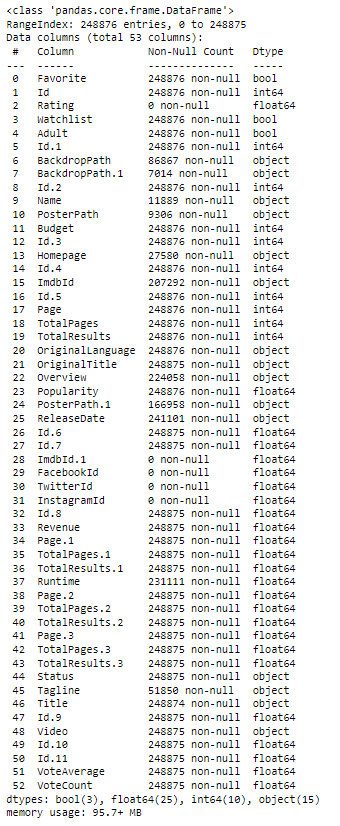

Load the data and filter out all unnecessary columns.

In [259]:
cols = ['OriginalLanguage', 'Budget', 'Popularity', 'ReleaseDate', 'Revenue', 'Title', 'Adult', 'Name', 'Status']
df = pd.read_csv('movies.csv', usecols=cols)

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248876 entries, 0 to 248875
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Adult             248876 non-null  bool   
 1   Name              11889 non-null   object 
 2   Budget            248876 non-null  int64  
 3   OriginalLanguage  248876 non-null  object 
 4   Popularity        248876 non-null  float64
 5   ReleaseDate       241101 non-null  object 
 6   Revenue           248875 non-null  float64
 7   Status            248875 non-null  object 
 8   Title             248874 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 15.4+ MB


Look into Missing data

In [261]:
df.isna().sum()

Adult                    0
Name                236987
Budget                   0
OriginalLanguage         0
Popularity               0
ReleaseDate           7775
Revenue                  1
Status                   1
Title                    2
dtype: int64

When observing the dataset in excel, there seem to be broken entries, such as here you can see record 254902 that seems to have it's values moved around. However when looking at it via pandas it is not.  
This shows that Excel does not handle this csv data well all the time (from what it misread ~300 out of ~250000 records).

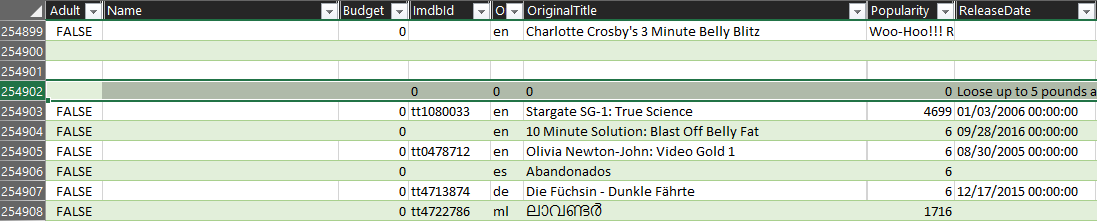

In [262]:
df.tail(7)

,Adult,Name,Budget,OriginalLanguage,Popularity,ReleaseDate,Revenue,Status,Title
248869,False,NaN,0,en,0.600,12/26/2014 00:00:00,0.0,Released,Charlotte Crosby's 3 Minute Belly Blitz
248870,False,NaN,0,en,4.699,01/03/2006 00:00:00,0.0,Released,Stargate SG-1: True Science
248871,False,NaN,0,en,0.600,09/28/2016 00:00:00,0.0,Released,10 Minute Solution: Blast Off Belly Fat
248872,False,NaN,0,en,0.600,08/30/2005 00:00:00,0.0,Released,Olivia Newton-John: Video Gold 1
248873,False,NaN,0,es,0.600,NaN,0.0,Released,Abandonados
248874,False,NaN,0,de,0.600,12/17/2015 00:00:00,0.0,Released,Die Füchsin - Dunkle Fährte
248875,False,NaN,0,ml,1.716,NaN,NaN,NaN,NaN


Firstly I will tidy up the data such as remove all Unreleased movies as these will not have any usefull impact when predicting how a movie will perform after release

In [263]:
movies = df.drop(df[df.Status != 'Released'].index)
print('Unreleased movies removed:', (len(df.index) - len(movies.index)))

Unreleased movies removed: 393


Create an easily readable boolean column for if the movie is part of a franchise/series

In [264]:
movies['Franchise'] = movies['Name'].map( {np.NAN: 0} ).fillna(1).astype(bool)
movies.head()

,Adult,Name,Budget,OriginalLanguage,Popularity,ReleaseDate,Revenue,Status,Title,Franchise
0,False,Blondie Collection,0,en,1.879,11/30/1938 00:00:00,0.0,Released,Blondie,True
1,False,NaN,0,de,0.726,01/01/1921 00:00:00,0.0,Released,"Peter Voss, Thief of Millions",False
2,False,NaN,0,fr,2.544,06/22/1962 00:00:00,0.0,Released,Love at Twenty,False
3,False,New World Disorder,0,en,0.652,12/08/2008 00:00:00,0.0,Released,New World Disorder 9: Never Enough,True
4,False,NaN,0,en,0.923,01/05/2010 00:00:00,0.0,Released,Sesame Street: Elmo Loves You!,False


Set all 0 values to null for easier analysis

In [279]:
movies[['Budget', 'Revenue', 'Popularity']] = movies[['Budget', 'Revenue', 'Popularity']].replace(0, np.NAN)

Now that the data has been tidied up I can have a clearer look of what data I am actually working with

In [283]:
movies = movies[['Adult', 'Budget', 'OriginalLanguage', 'Popularity', 'ReleaseDate', 'Revenue', 'Title', 'Franchise']]
movies.info()
print('\nMovies with Budget & Revenue:', len(movies[(~movies['Budget'].isnull()) & (~movies['Revenue'].isnull())].index))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248483 entries, 0 to 248874
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Adult             248483 non-null  bool   
 1   Budget            16420 non-null   float64
 2   OriginalLanguage  248483 non-null  object 
 3   Popularity        248483 non-null  float64
 4   ReleaseDate       241087 non-null  object 
 5   Revenue           11308 non-null   float64
 6   Title             248482 non-null  object 
 7   Franchise         248483 non-null  bool   
dtypes: bool(2), float64(3), object(3)
memory usage: 13.7+ MB

Movies with Budget & Revenue: 7717


## Analytic Approach

## Evaluation